# Exploratory Data Analysis for Solar Radiation Data
## 1. Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## 2. Importing Data

In [5]:
df = pd.read_csv('../data/sierraleone-bumbuna.csv')

## 3. Data Overview

In [7]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [8]:
df.columns

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')

In [9]:
df.info

<bound method DataFrame.info of                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0

In [10]:
df.shape

(525600, 19)

In [11]:
df.dtypes	

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

## Summary Statistics and Missing-Value Report

In [13]:
df.select_dtypes(include='number').describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [14]:
df.isna().sum() 

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [15]:
missing_percent = df.isna().mean() * 100
null_column_percentage = missing_percent[missing_percent > 5]
null_column_percentage

Comments    100.0
dtype: float64

## Outlier Detection & Basic Cleaning

### 1. Negative values

In [18]:
cols = ['GHI','DNI','DHI']
for col in cols:
    print(f"col {col} has {len(df[df[col]<0])} negative dfs and {round(len(df[df[col]<0])/len(df)*100,2)}% of the data")

col GHI has 261135 negative dfs and 49.68% of the data
col DNI has 266352 negative dfs and 50.68% of the data
col DHI has 263128 negative dfs and 50.06% of the data


### Action

In [20]:
## Replace Negative values with mean value of the column
cols = ['GHI','DNI','DHI']
for col in cols:
    mean_val = df[df[col] >= 0][col].mean()
    df[col] = df[col].apply(lambda x: mean_val if x < 0 else x)

### 2. Outliers

In [22]:
cols = ['ModA', 'ModB', 'WS', 'WSgust']
z_scores_df = df[cols].apply(zscore)
for col in cols:
    outlier_flags = z_scores_df[col].abs() > 3
    outlier_rows = df[outlier_flags]
    print(f"col {col} has {len(outlier_rows)} outliers and {round(len(outlier_rows) / len(df) * 100, 2)}% of the data")


col ModA has 1604 outliers and 0.31% of the data
col ModB has 2041 outliers and 0.39% of the data
col WS has 3967 outliers and 0.75% of the data
col WSgust has 3665 outliers and 0.7% of the data


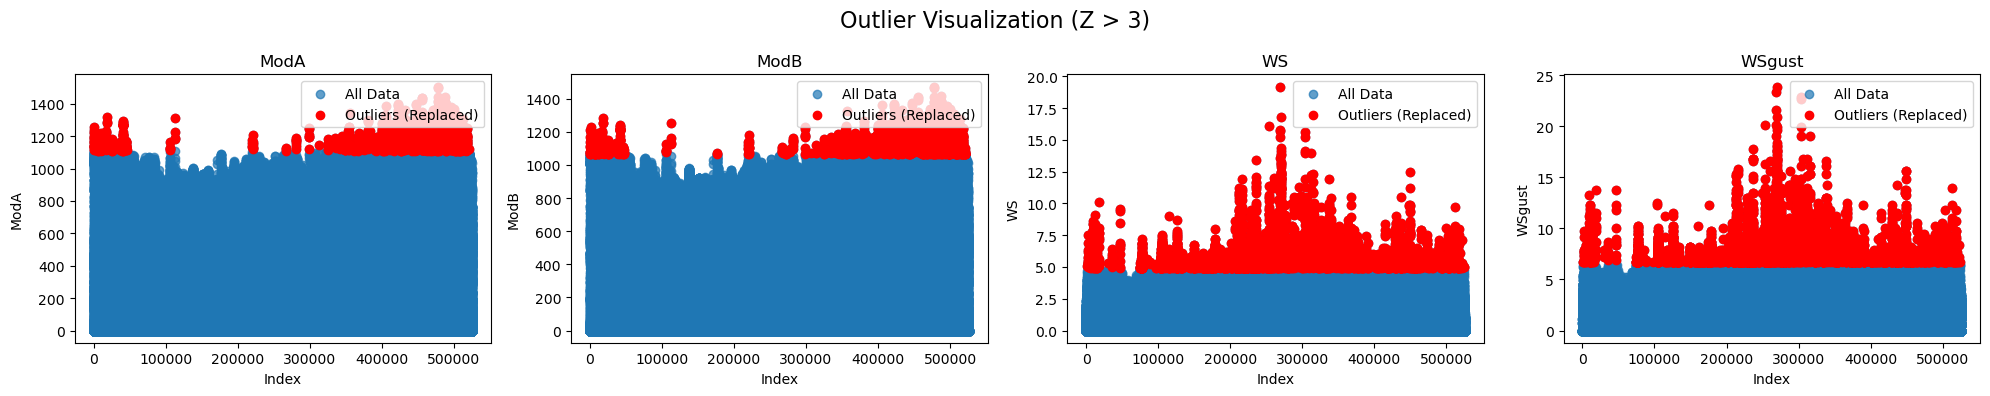

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(5 * len(cols), 4), sharey=False)

for i, col in enumerate(cols):
    z_scores = zscore(df[col])
    outliers = np.abs(z_scores) > 3

    ax = axes[i] if len(cols) > 1 else axes
    ax.scatter(df.index, df[col], label='All Data', alpha=0.7)
    ax.scatter(df.index[outliers], df.loc[outliers, col], color='r', label='Outliers (Replaced)')
    ax.set_title(f'{col}')
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.legend(loc='upper right')  

plt.suptitle('Outlier Visualization (Z > 3)', fontsize=16)
plt.tight_layout()
plt.show()


### Action

In [25]:
## Replace Outlier values with mean value of the column
cols = ['ModA', 'ModB', 'WS', 'WSgust']
for col in cols:
    outlier_flags = z_scores_df[col].abs() > 3
    outlier_rows = df[outlier_flags]
    non_outlier_mean = df.loc[~outlier_flags, col].mean()
    df.loc[outlier_flags, col] = non_outlier_mean

## Remove Columns

In [27]:
df.drop('Comments',  axis=1, inplace=True)

## Save Data

In [29]:
df.to_csv('../data/sierraleone_clean.csv', index=False)

## Time Series Analysis

In [31]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

<Figure size 1400x700 with 0 Axes>

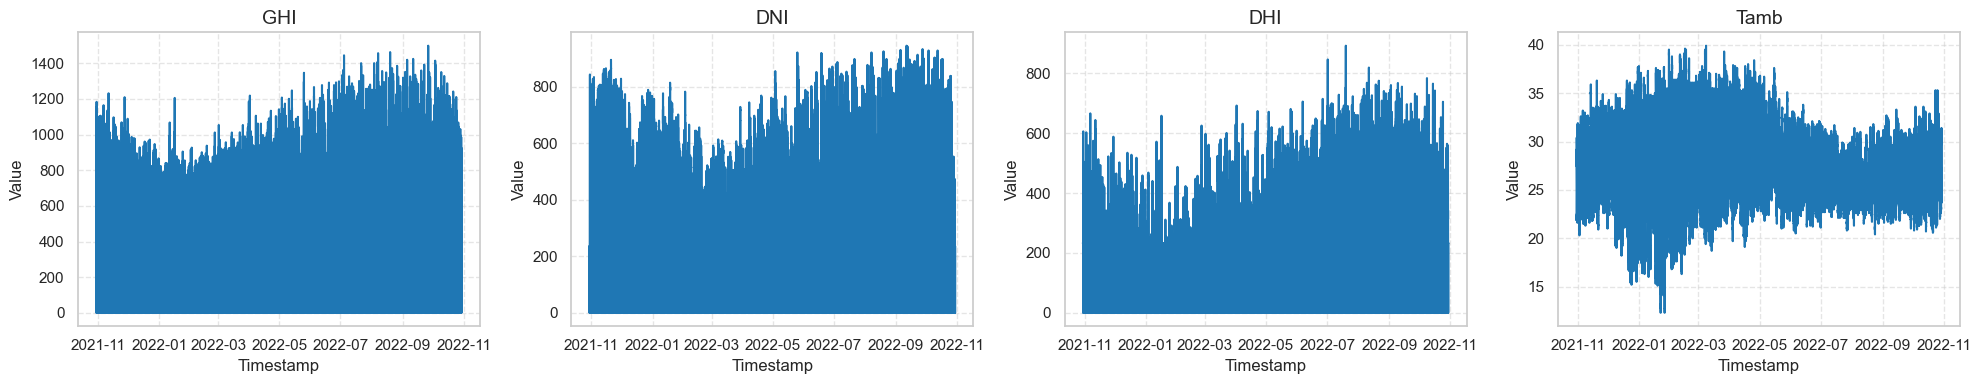

In [32]:

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
columns = ['GHI', 'DNI', 'DHI', 'Tamb']

fig, axes = plt.subplots(1, len(columns), figsize=(20, 4), sharex=True)

for ax, col in zip(axes, columns):
    ax.plot(df.index, df[col], color='tab:blue')
    ax.set_title(f'{col}', fontsize=14)
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Value')
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Time Series Patterns by Month

In [34]:
# Extract month
df['Month'] = df.index.month
variables = ['GHI', 'DNI', 'DHI', 'Tamb']
units = ['W/m²', 'W/m²', 'W/m²', '°C']

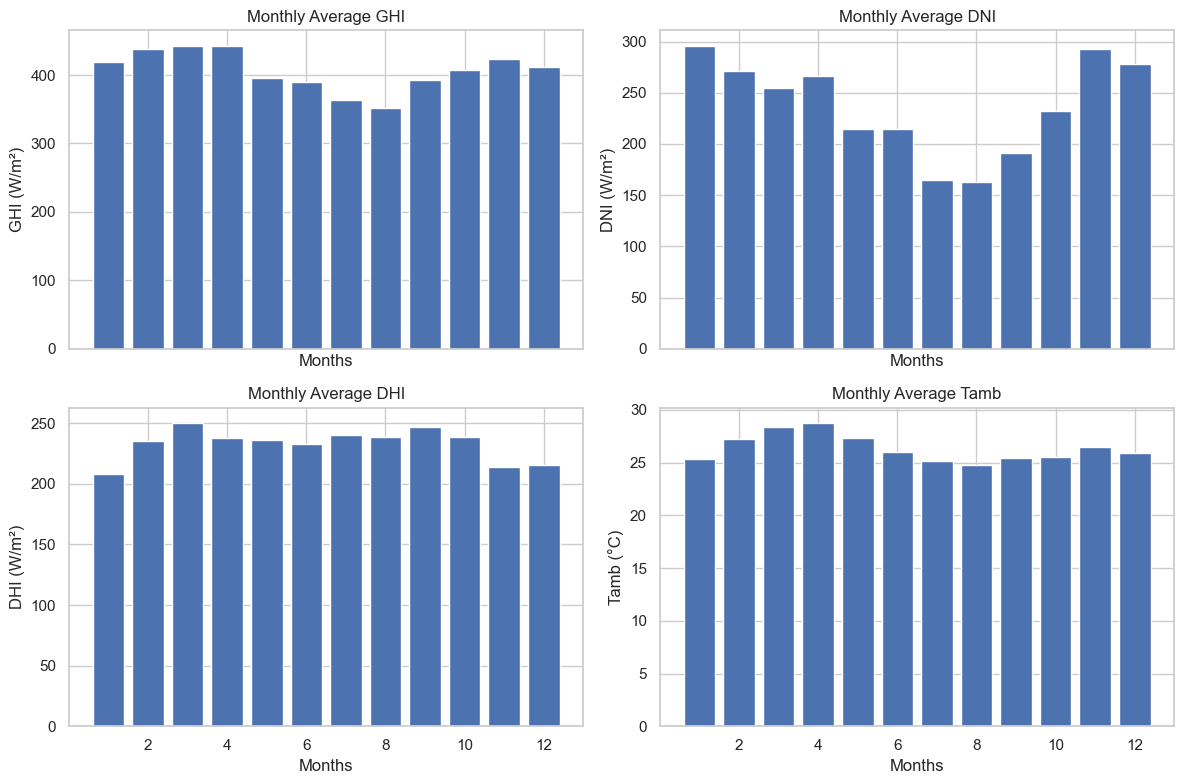

In [35]:
# Plot bar charts for monthly trends
monthly_avg = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.flatten()

for i, (var, unit) in enumerate(zip(variables, units)):
    axes[i].bar(monthly_avg.index, monthly_avg[var])
    axes[i].set_title(f'Monthly Average {var}')
    axes[i].set_xlabel('Months')
    axes[i].set_ylabel(f'{var} ({unit})')
    axes[i].grid(True, axis='y')

plt.tight_layout()
plt.show()

## Daily Time Series Patterns

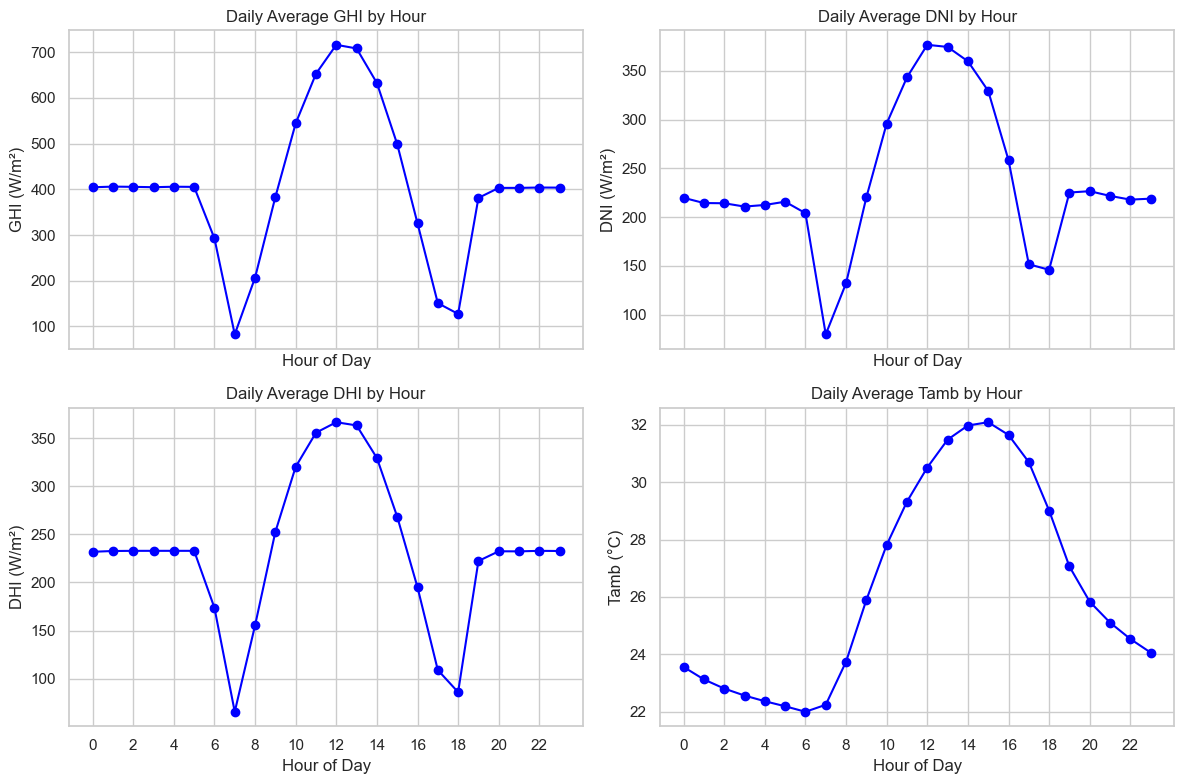

In [37]:
# Daily Trends
df['Hour'] = df.index.hour
hourly_avg = df.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.flatten()
for i, (var, unit) in enumerate(zip(variables, units)):
    axes[i].plot(hourly_avg.index, hourly_avg[var], marker='o', color='blue')
    axes[i].set_title(f'Daily Average {var} by Hour')
    axes[i].set_xlabel('Hour of Day')
    axes[i].set_ylabel(f'{var} ({unit})')
    axes[i].grid(True)
    axes[i].set_xticks(range(0, 24, 2))
plt.tight_layout()
plt.show()


## Cleaning Impact

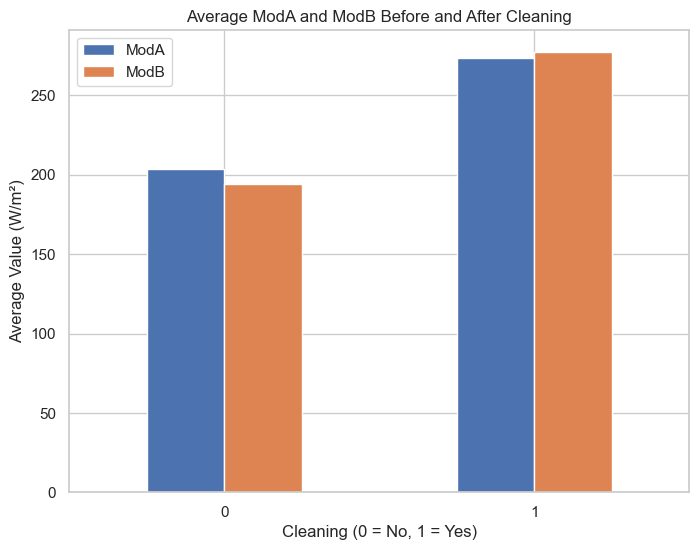

In [39]:
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
cleaning_impact.plot(kind='bar', figsize=(8, 6))
plt.title('Average ModA and ModB Before and After Cleaning')
plt.xlabel('Cleaning (0 = No, 1 = Yes)')
plt.ylabel('Average Value (W/m²)')
plt.xticks(rotation=0)
plt.show()

## Correlation & Relationship Analysis

### Heatmap of correlations (GHI, DNI, DHI, TModA, TModB).

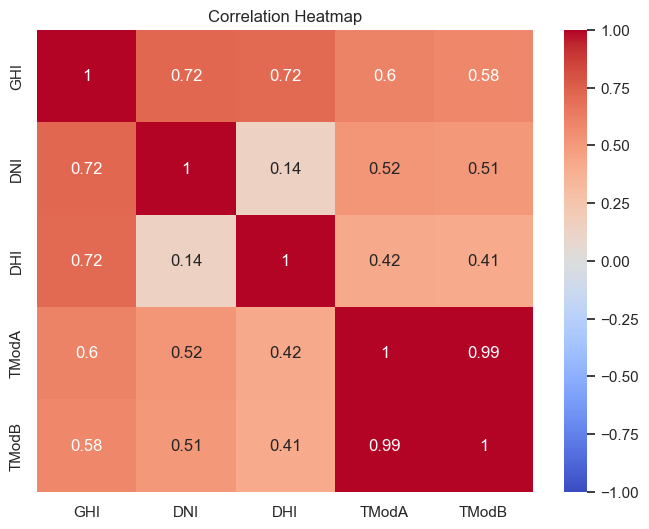

In [42]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

### Scatter plots: WS, WSgust, WD vs. GHI

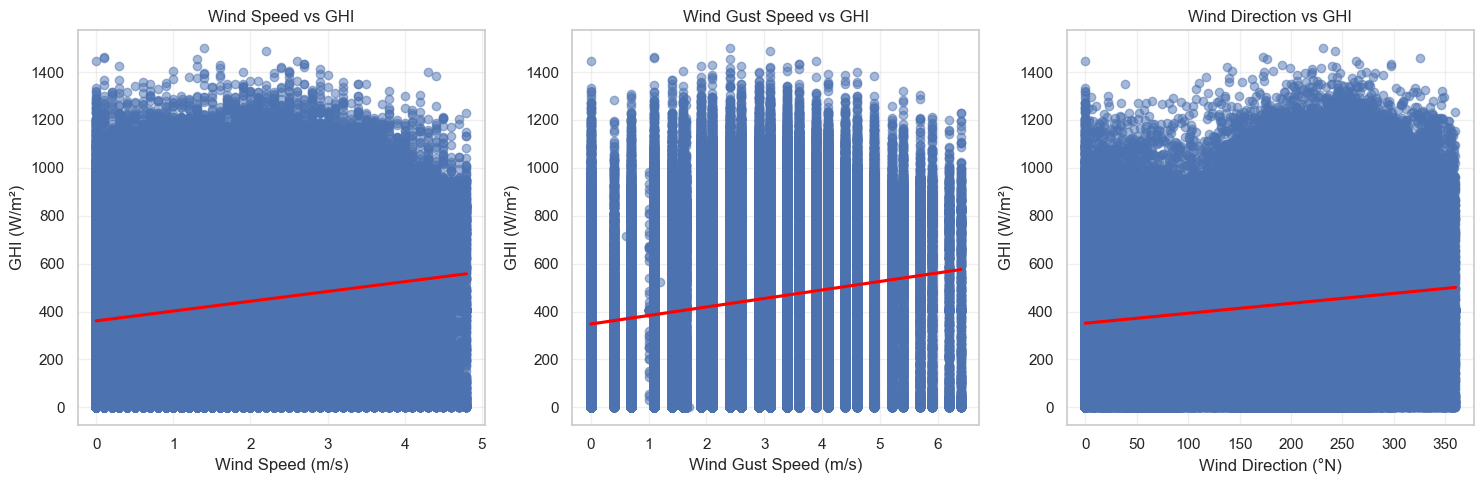

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(x='WS', y='GHI', data=df, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title('Wind Speed vs GHI')
axes[0].set_xlabel('Wind Speed (m/s)')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].grid(True, alpha=0.3)
sns.regplot(x='WSgust', y='GHI', data=df, ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1].set_title('Wind Gust Speed vs GHI')
axes[1].set_xlabel('Wind Gust Speed (m/s)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].grid(True, alpha=0.3)
sns.regplot(x='WD', y='GHI', data=df, ax=axes[2], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[2].set_title('Wind Direction vs GHI')
axes[2].set_xlabel('Wind Direction (°N)')
axes[2].set_ylabel('GHI (W/m²)')
axes[2].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### RH vs. Tamb

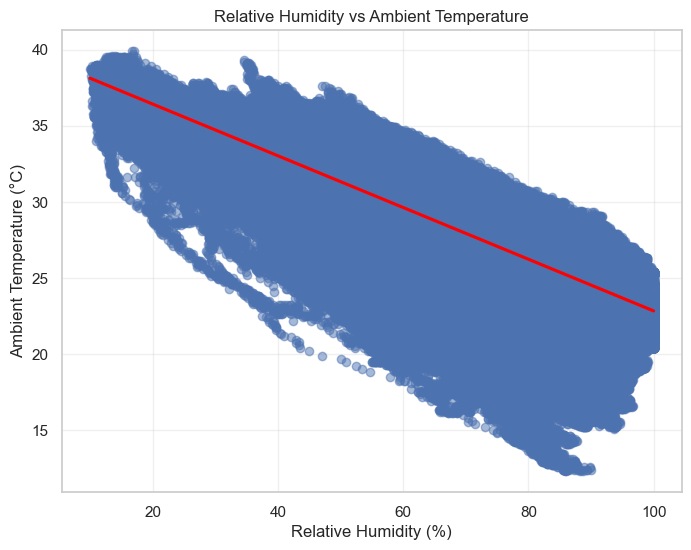

In [46]:
plt.figure(figsize=(8, 6))
sns.regplot(x='RH', y='Tamb', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relative Humidity vs Ambient Temperature')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.show()

###  RH vs. GHI

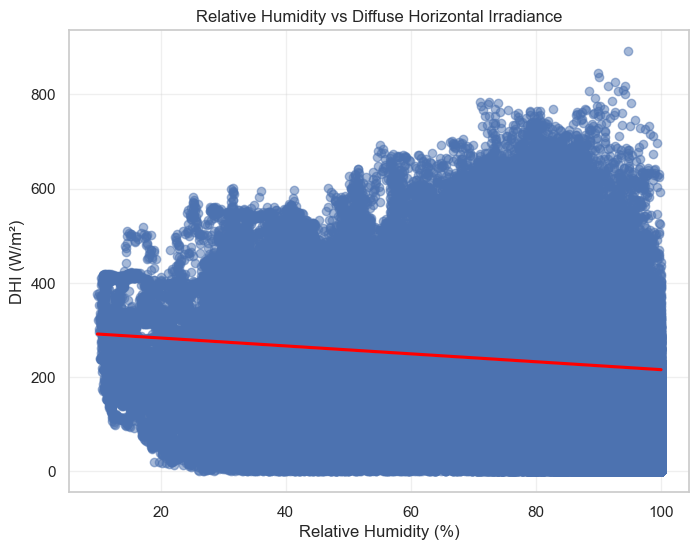

In [48]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='RH', y='DHI', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relative Humidity vs Diffuse Horizontal Irradiance')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('DHI (W/m²)')
plt.grid(True, alpha=0.3)
plt.show()

## Wind & Distribution Analysis

### Radial bar plot of WS/WD.

C:\Users\hp\AppData\Local\Temp\ipykernel_26300\3279613672.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wd_speed = df.groupby('WD_bin')['WS'].mean()


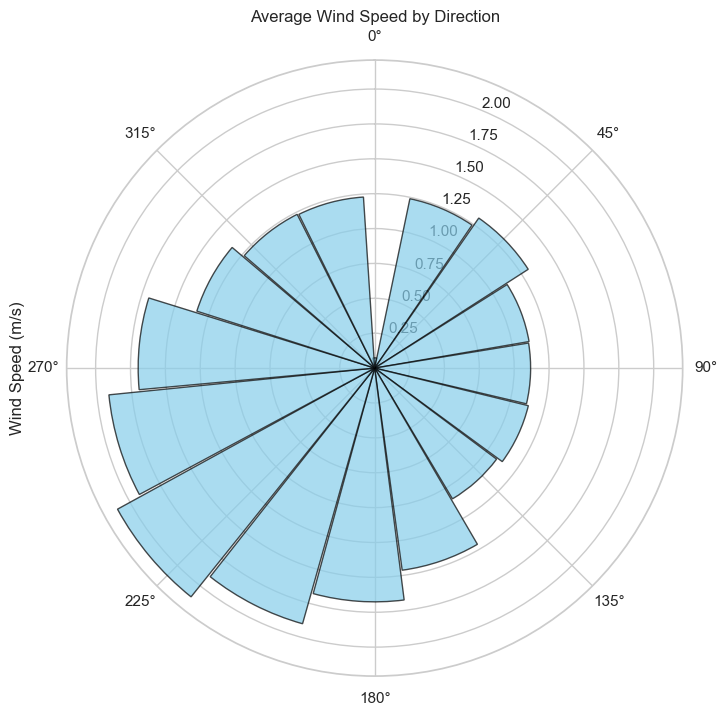

In [51]:
bins = np.arange(0, 360 + 23, 23)
df['WD_bin'] = pd.cut(df['WD'], bins=bins, include_lowest=True, labels=bins[:-1])
wd_speed = df.groupby('WD_bin')['WS'].mean()
angles = np.deg2rad(wd_speed.index.astype(float))
width = np.deg2rad(22.5)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(angles, wd_speed, width=width, edgecolor='black', alpha=0.7, color='skyblue')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_title('Average Wind Speed by Direction')
ax.set_ylabel('Wind Speed (m/s)', labelpad=30)
plt.show()

### Histograms for GHI and one other variable (e.g. WS).

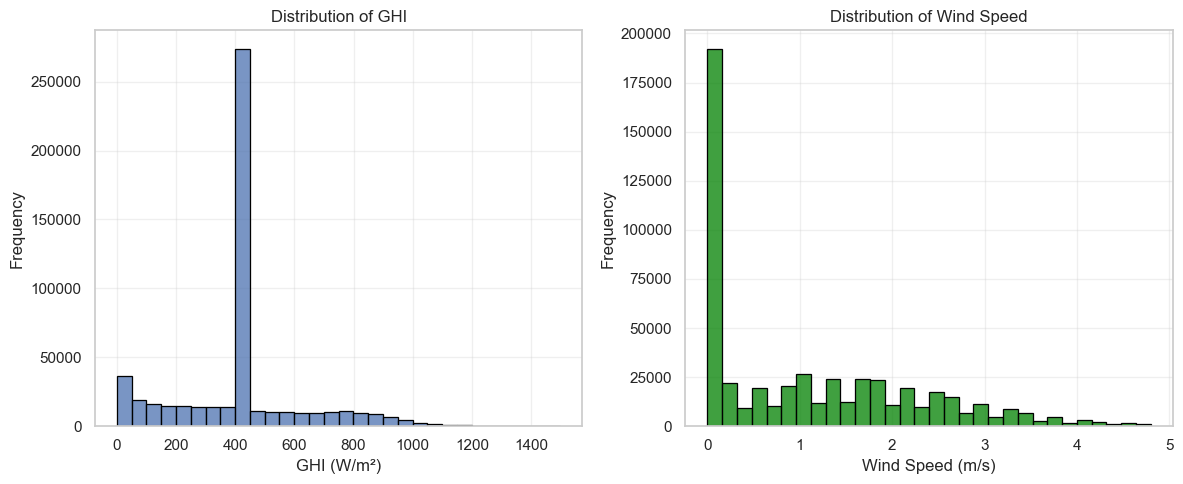

In [53]:
# Histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# GHI histogram
sns.histplot(data=df, x='GHI', bins=30, ax=axes[0], edgecolor='black')
axes[0].set_title('Distribution of GHI')
axes[0].set_xlabel('GHI (W/m²)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# WS histogram
sns.histplot(data=df, x='WS', bins=30, ax=axes[1], edgecolor='black', color='green')
axes[1].set_title('Distribution of Wind Speed')
axes[1].set_xlabel('Wind Speed (m/s)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Temperature Analysis

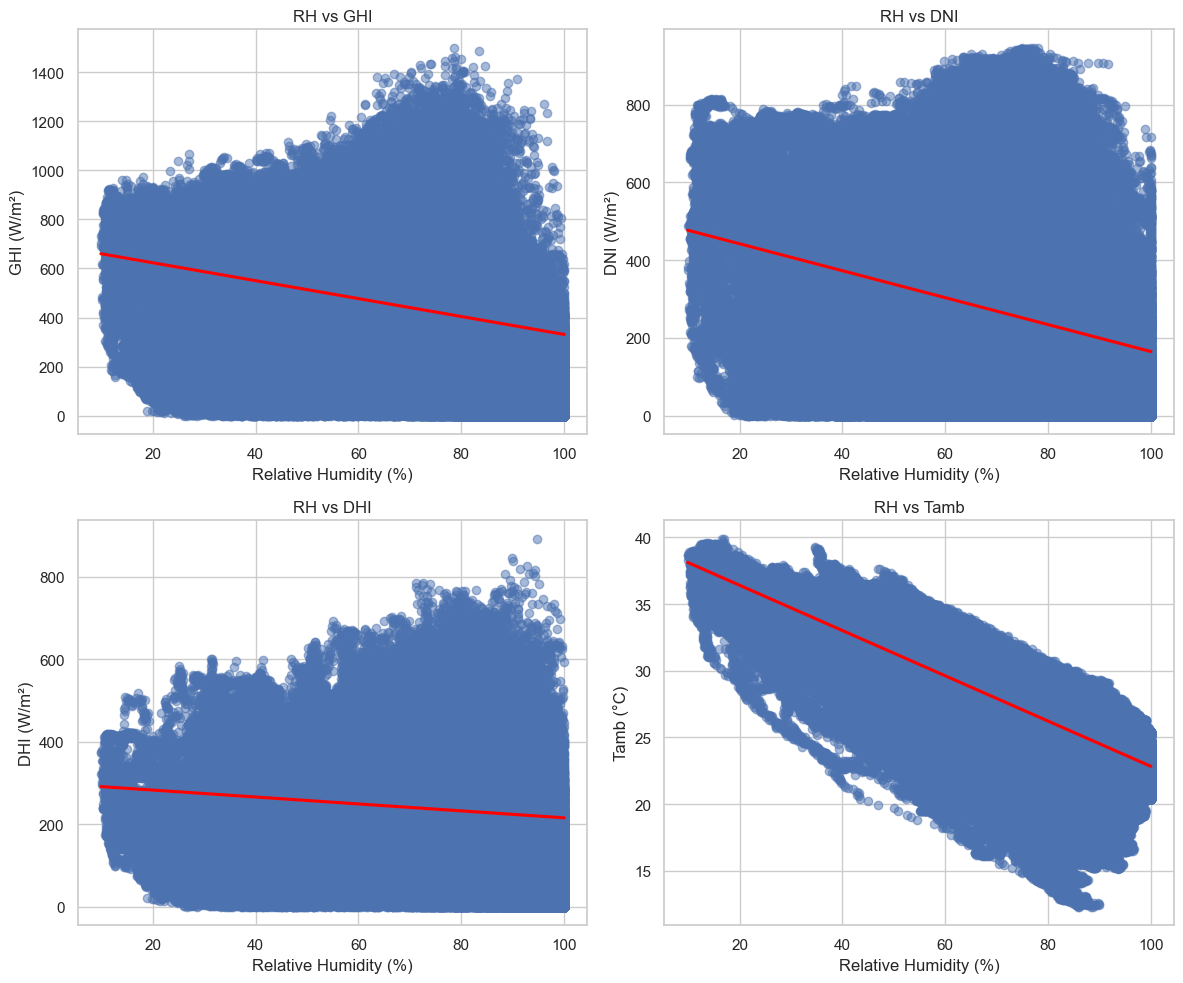

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (var, unit) in enumerate(zip(variables, units)):
    sns.regplot(x='RH', y=var, data=df, ax=axes[i], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axes[i].set_title(f'RH vs {var}')
    axes[i].set_xlabel('Relative Humidity (%)')
    axes[i].set_ylabel(f'{var} ({unit})')

plt.tight_layout()
plt.show()

### Bubble Chart


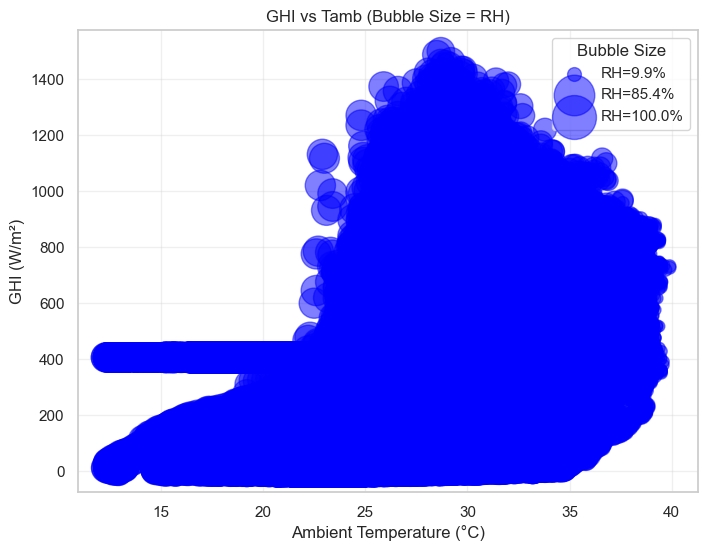

In [57]:
rh_sizes = [df['RH'].min(), df['RH'].median(), df['RH'].max()]
rh_sizes = [round(x, 1) for x in rh_sizes]
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*5, alpha=0.5, c='blue')
plt.title('GHI vs Tamb (Bubble Size = RH)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, alpha=0.3)
# Dynamic legend for RH
for size in rh_sizes:
    plt.scatter([], [], s=size*10, label=f'RH={size}%', c='blue', alpha=0.5)
plt.legend(title='Bubble Size')
plt.show()

RH sizes for legend (min, median, max): [9.9, 85.4, 100.0]


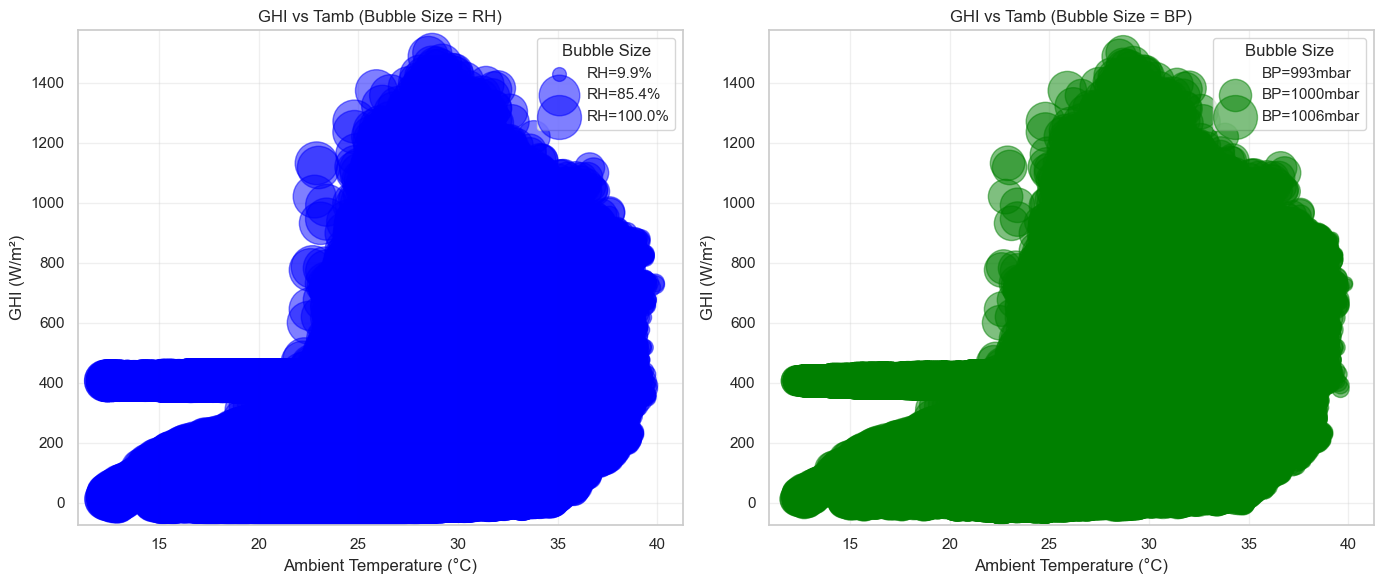

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
rh_sizes = [df['RH'].min(), df['RH'].median(), df['RH'].max()]
rh_sizes = [round(x, 1) for x in rh_sizes]
print("RH sizes for legend (min, median, max):", rh_sizes)

bp_sizes = [df['BP'].min(), df['BP'].median(), df['BP'].max()]
bp_sizes = [round(x, 1) for x in bp_sizes]
scatter1 = axes[0].scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5, c='blue')
axes[0].set_title('GHI vs Tamb (Bubble Size = RH)')
axes[0].set_xlabel('Ambient Temperature (°C)')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].grid(True, alpha=0.3)
for size in rh_sizes:
    axes[0].scatter([], [], s=size*10, label=f'RH={size}%', c='blue', alpha=0.5)
axes[0].legend(title='Bubble Size')

# GHI vs Tamb, bubble size = BP
bp_scaled = (df['BP'] - df['BP'].min()) / (df['BP'].max() - df['BP'].min()) * 1000
scatter2 = axes[1].scatter(df['Tamb'], df['GHI'], s=bp_scaled, alpha=0.5, c='green')
axes[1].set_title('GHI vs Tamb (Bubble Size = BP)')
axes[1].set_xlabel('Ambient Temperature (°C)')
axes[1].set_ylabel('GHI (W/m²)')
axes[1].grid(True, alpha=0.3)
for size in bp_sizes:
    scaled_size = (size - df['BP'].min()) / (df['BP'].max() - df['BP'].min()) * 1000
    axes[1].scatter([], [], s=scaled_size, label=f'BP={int(size)}mbar', c='green', alpha=0.5)
axes[1].legend(title='Bubble Size')

plt.tight_layout()
plt.show()